In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

# Data collection and processing

In [2]:
car_dset=pd.read_csv('car data.csv')

In [3]:
car_dset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
 car_dset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_dset.shape

(301, 9)

In [6]:
#checking number of missing values
car_dset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
car_dset['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [8]:
car_dset['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [9]:
car_dset['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

# Label Encoding categorical data


In [10]:
car_dset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2},'Seller_Type':{'Dealer':0,'Individual':1},'Transmission':{'Manual':0,'Automatic':1} },inplace=True) 

In [11]:
car_dset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [12]:
car_dset['Fuel_Type'].value_counts()

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64

## Splitting the data and target

In [13]:
X=car_dset.drop(['Car_Name','Selling_Price'],axis=1)
Y=car_dset['Selling_Price']

In [14]:
X.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,5.59,27000,0,0,0,0
1,2013,9.54,43000,1,0,0,0
2,2017,9.85,6900,0,0,0,0
3,2011,4.15,5200,0,0,0,0
4,2014,6.87,42450,1,0,0,0


In [15]:
Y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

## Splitting Into Training & Test data

In [16]:
X_train, X_test , Y_train,Y_test = train_test_split(X,Y,test_size=0.1, random_state=2)

### 1. Model Training Using Linear Regression

In [24]:
#loading the linear regression model
lin_reg_model=LinearRegression()

In [25]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

### Model Evaluation

In [27]:
#predicting on training data
training_data_prediction = lin_reg_model.predict(X_train)

In [28]:
# R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print('R squared error : ',error_score)

R squared error :  0.8799451660493698


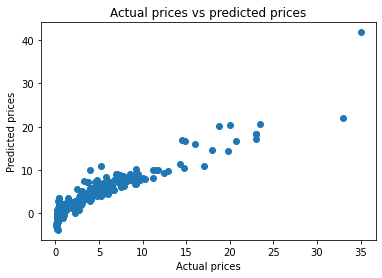

In [31]:
#Vizualize the actual prices and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual prices vs predicted prices')
plt.show()

In [32]:
#prediction on Test data
test_data_prediction= lin_reg_model.predict(X_test)

In [33]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R squared error : ',error_score)

R squared error :  0.8365766715026905


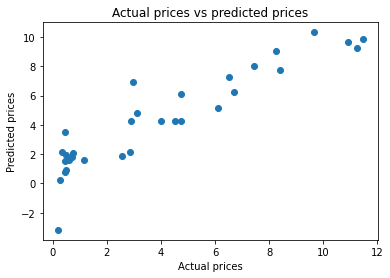

In [34]:
#Vizualize the actual prices and predicted prices
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual prices vs predicted prices')
plt.show()

### 2. Predicting using Lasso Regression

In [35]:
lasso_reg_model=Lasso()

In [36]:
lasso_reg_model.fit(X_train,Y_train)

Lasso()

### Model Evalueation

In [37]:
#Model Evalueation
training_data_prediction = lasso_reg_model.predict(X_train)

In [38]:
# R squared error
error_score = metrics.r2_score(Y_train,training_data_prediction)
print('R squared error : ',error_score)

R squared error :  0.8427856123435794


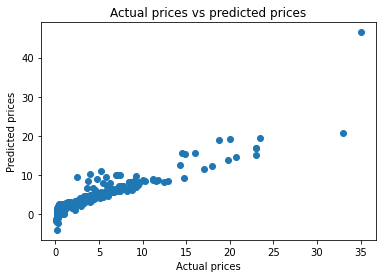

In [39]:
#Vizualize the actual prices and predicted prices
plt.scatter(Y_train,training_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual prices vs predicted prices')
plt.show()

In [40]:
#prediction on Test data
test_data_prediction= lasso_reg_model.predict(X_test)

In [41]:
# R squared error
error_score = metrics.r2_score(Y_test,test_data_prediction)
print('R squared error : ',error_score)

R squared error :  0.8709167941173195


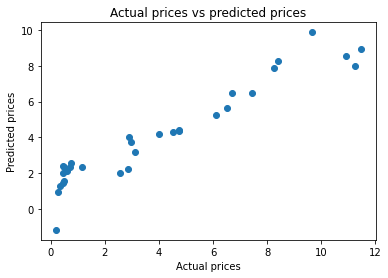

In [42]:
#Vizualize the actual prices and predicted prices
plt.scatter(Y_test,test_data_prediction)
plt.xlabel('Actual prices')
plt.ylabel('Predicted prices')
plt.title('Actual prices vs predicted prices')
plt.show()